In [1]:
import pandas as pd
import numpy as np

from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import itertools

In [2]:
players = pd.read_csv('merged_players42-12.csv',index_col=0,parse_dates=['debut','finalGame'])
players.head()

,playerID,FPCT,POS,G,SH,OBP,AB/G,HR/G,SB/G,RBI/G,IBB/G,SF/G,debut,finalGame,weight,servingDays,debutAge,inducted
0,aaronha01,0.979124,OF,3298,21.0,0.373949,3.748939,0.228927,0.072771,0.696483,0.088842,0.036689,1954-04-13,1976-10-03,180.0,8209.0,20.293151,Y
1,aaronto01,0.982705,1B,437,9.0,0.291506,2.160183,0.029748,0.020595,0.215103,0.006865,0.013730,1962-04-10,1971-09-26,190.0,3456.0,23.287671,N
2,aasedo01,0.955399,P,448,0.0,0.000000,0.011161,0.000000,0.000000,0.000000,0.000000,0.000000,1977-07-26,1990-10-03,190.0,4817.0,23.580822,N
3,abadan01,0.986486,1B,15,0.0,0.240000,1.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-09-10,2006-04-13,184.0,1676.0,29.712329,N
4,abbotje01,0.975208,OF,233,5.0,0.307453,2.557940,0.077253,0.025751,0.356223,0.008584,0.030043,1997-06-10,2001-09-29,190.0,1572.0,25.457534,N


In [3]:
players.shape

(7927, 18)

In [4]:
players.columns

Index(['playerID', 'FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'debut', 'finalGame', 'weight', 'servingDays',
       'debutAge', 'inducted'],
      dtype='object')

servingDays are just used for filter samples when check outliers.

In [5]:
players = players[players['finalGame'].apply(lambda x: x.year<=1960)]

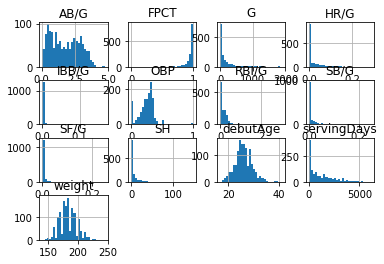

In [6]:
players.hist(bins=30)
plt.show()

In [20]:
features = [['G'],
            ['G','POS'],
            ['OBP'],
            ['FPCT'],
            ['FPCT','POS'],
            ['OBP','FPCT','POS'],
            ['G','OBP'],
            ['G','OBP','FPCT'],
            ['G','OBP','FPCT','POS'],
            ['G','FPCT'],
            ['G','FPCT','POS'],
            ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']]

num_list = []
for feature in features:
    X = players[feature]
    if ('POS' in feature):
        X = pd.get_dummies(X, columns = ['POS'] )
    y = players[['inducted']]
    
    clf = GaussianNB()
    clf.fit(X,y)
    
    outlier_scores = clf.predict_proba(X)[:,1]
    players_pre = players[['playerID','servingDays','inducted']]
    players_pre.loc[:,'outlier_score']=outlier_scores

    player10 = players_pre[players_pre['servingDays']>2000].sort_values(['outlier_score'],ascending=False).iloc[:10,:]

    num = (player10[player10['inducted']=='Y'].shape[0])
    num_list.append([num,feature])
    print(num)

num_list

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] =

3
3
3
0
1
1
4
4
3
3
3
4


[[3, ['G']],
 [3, ['G', 'POS']],
 [3, ['OBP']],
 [0, ['FPCT']],
 [1, ['FPCT', 'POS']],
 [1, ['OBP', 'FPCT', 'POS']],
 [4, ['G', 'OBP']],
 [4, ['G', 'OBP', 'FPCT']],
 [3, ['G', 'OBP', 'FPCT', 'POS']],
 [3, ['G', 'FPCT']],
 [3, ['G', 'FPCT', 'POS']],
 [4,
  ['FPCT',
   'POS',
   'G',
   'SH',
   'OBP',
   'AB/G',
   'HR/G',
   'SB/G',
   'RBI/G',
   'IBB/G',
   'SF/G',
   'weight',
   'debutAge']]]

In [7]:
feature0 = ['G']
feature1 = ['G','OBP']
feature2 = ['G','OBP','FPCT']
feature3 = ['G','OBP','FPCT','POS']
feature5 = ['G','FPCT']
feature6 = ['G','FPCT','POS']

feature4 = ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']

In [8]:
features = [['G'],
            ['G','OBP'],
            ['G','OBP','FPCT'],
            ['G','OBP','FPCT','POS'],
            ['G','FPCT'],
            ['G','FPCT','POS'],
            ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']]

In [9]:
from sklearn.model_selection import KFold

In [10]:
players_new = players[['playerID','servingDays','inducted']]

for feature in features:
    X = players[feature]
    if ('POS' in feature):
        X = pd.get_dummies(X, columns = ['POS'] )
    y = players[['inducted']]
    
    kf = KFold(n_splits=5)
    num = 0
    for train, test in kf.split(X):
        model = GaussianNB()
        model.fit(X.iloc[train], y.iloc[train])
        outlier_prob = model.predict_proba(X.iloc[test])[:,1]

        players_pre = players_new.iloc[test]
        players_pre.loc[:,'outlier_prob'] = outlier_prob # Larger, outliers.
        player10 = players_pre[players_pre['servingDays']>2000].sort_values(['outlier_prob'],ascending=False).iloc[:20,:]
        num += (player10[player10['inducted']=='Y'].shape[0])
    print(num)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] =

6
6
6
3
6
3
4


In [11]:
players.inducted.value_counts()

N    1342
Y       7
Name: inducted, dtype: int64

In [15]:
from sklearn.model_selection import KFold
from imblearn.over_sampling import SMOTE

features = [['G'],
            ['OBP'],
            ['FPCT'],
            ['G','OBP'],
            ['G','OBP','FPCT'],
            ['G','OBP','FPCT','POS'],
            ['G','FPCT'],
            ['G','FPCT','POS'],
            ['FPCT', 'POS', 'G', 'SH', 'OBP', 'AB/G', 'HR/G', 'SB/G',
       'RBI/G', 'IBB/G', 'SF/G', 'weight', 'debutAge']]

players_new = players[['playerID','servingDays','inducted']]
num_list = []
for feature in features:
    X = players[feature]
    if ('POS' in feature):
        X = pd.get_dummies(X, columns = ['POS'] )
    y = players[['inducted']]
    
    kf = KFold(n_splits=5)
    num = 0
    for train, test in kf.split(X):
        model = GaussianNB()        
#         sm = SMOTE(random_state=42)
#         X_res, y_res = sm.fit_sample(X.iloc[train,:], y.iloc[train,:])
#         X_res = pd.DataFrame(X_res)
#         y_res = pd.DataFrame(y_res)
#         X_res.columns = X.columns
#         y_res.columns = y.columns
#         print(X_res)
#         model.fit(X_res, y_res)
        model.fit(X.iloc[train,:], y.iloc[train,:])
#         X.iloc[test,:]
        outlier_prob = model.predict_proba(X.iloc[test,:])[:,1]

        players_pre = players_new.iloc[test,:]
        players_pre.loc[:,'outlier_prob'] = outlier_prob # Larger, outliers.
        player10 = players_pre[players_pre['servingDays']>2000].sort_values(['outlier_prob'],ascending=False).iloc[:2,:]
        num += (player10[player10['inducted']=='Y'].shape[0])
    num_list.append(num)
    print(num)

num_list

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] =

2
1
0
2
2
0
2
0
0


[2, 1, 0, 2, 2, 0, 2, 0, 0]

In [14]:
num_list

[6, 6, 2, 6, 6, 3, 6, 3, 4]